    Segmentation
    

Segmentation in image processing refers to the process of dividing an image into multiple segments or regions.<br>
It is usually done on the basis of color, texture, intensity, or other features. <br>
The goal of segmentation is to extract meaningful information from an image and to separate the foreground objects from the background.<br>
<br>


There are various techniques used for image segmentation, such as thresholding, clustering, and region growing.<br>
1. Thresholding involves setting a threshold value for a specific feature of an image, such as color or intensity, and separating the pixels above and below that threshold.<br>
2. Clustering involves grouping pixels based on their similarity, while edge detection involves identifying the boundaries between different regions in an image. <br>
3. Region growing is a technique in which pixels are iteratively added to a region based on similarity criteria.
   


Image segmentation is a fundamental step in many computer vision applications such as object recognition, image retrieval, and medical imaging. It can also be used for image compression, image editing, and image annotation.

    Otsu's method

Otsu's method is a global thresholding technique. It is used to automatically determine an optimal threshold value for separating foreground and background pixels in a grayscale image.<br>
Otsu's method works by maximizing the variance between the two classes of pixels (foreground and background) that are separated by the threshold. <br>The threshold value that maximizes this variance is chosen as the optimal threshold for segmentation.<br>
Since Otsu's method uses a single threshold value for the entire image, it is a global thresholding technique. It is a widely used and effective method for image segmentation and can be applied to images with a bimodal histogram, where the pixel intensity values can be clearly separated into two distinct groups.<br>

For example, in a medical image of a brain scan, the gray matter and white matter in the brain can produce a bimodal histogram, where the gray matter pixels have a different intensity value than the white matter pixels.

    Step's of Otsu's method

The method involves the following steps:

1. Compute the histogram of the grayscale image, which represents the frequency distribution of pixel intensity values in the image.

2. Calculate the total number of pixels in the image and the cumulative sum of the histogram.

3. Compute the mean intensity value of the image by dividing the cumulative sum of the histogram by the total number of pixels.

4. Calculate the between-class variance, which is the variance between the two classes of pixels (foreground and background) separated by a threshold. This is calculated for all possible threshold values between the minimum and maximum pixel intensity values in the image.

5. The threshold value that maximizes the between-class variance is chosen as the optimal threshold for image segmentation.

6. Finally, the image is thresholded using the optimal threshold value, and the foreground and background regions are separated.

    Import the required libraries:

In [99]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt


    Load the image and convert it to grayscale:

In [100]:
img = Image.open("org.png").convert("L")

    Compute the histogram of the image

In [101]:
hist, bins = np.histogram(img, bins=256, range=(0, 256))

The hist array contains the frequency counts for each bin in the histogram.<br>
It is a one-dimensional array with n elements, where n is the number of bins.<br>
The bins array contains the edges of each bin in the histogram.<br>
It is a one-dimensional array with n+1 elements, where n is the number of bins.<br><br>
For example, if bins is [0,1,2,3] & hist is [2,3,5], <br>it means that the histogram has three bins with edges <br>[0,1), [1,2), and [2,3] with each bin has a frequency 2,3 and 5 respectively.

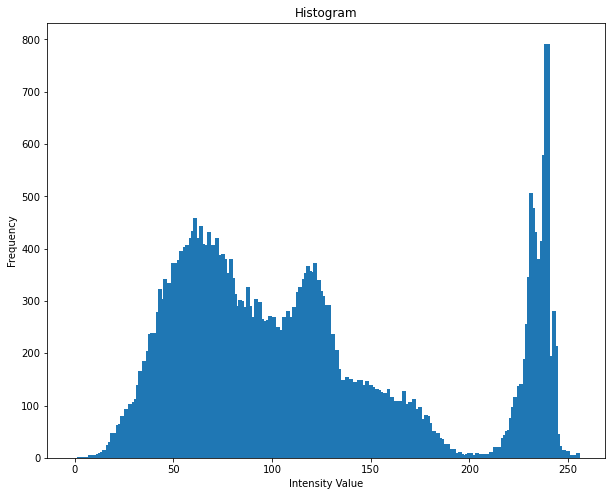

In [102]:
# Plot histogram
plt.figure(figsize=(10,8))
plt.bar(bins[:-1], hist,width=2)
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

    Compute the probability mass function (PMF)

In [103]:
#normalising frequencies so that total sum will be 1
pmf = hist.astype(float) / np.sum(hist)

    Computer the cumulative sum and mean values of PMF

In [104]:
cumulative_sum = np.cumsum(pmf)
mean_values = np.arange(0, 256) * pmf

    Compute the global mean and the between-class variance:

In [105]:
# Compute the between-class variance for all possible thresholds
variances = np.zeros(256)
for t in range(256):
    w0 = np.sum(pmf[:t+1])
    w1 = np.sum(pmf[t+1:])
    if w0 == 0 or w1 == 0:
        continue
    mean0 = np.sum(mean_values[:t+1]) / w0
    mean1 = np.sum(mean_values[t+1:]) / w1
    variances[t] = w0 * w1 * (mean0 - mean1) ** 2


    Find the threshold value that maximizes the between-class variance:

In [106]:
threshold = np.argmax(variances)


    Segment the image based on the threshold

In [107]:
segmented_img = np.where(img > threshold, 255, 0)

    Display the original and segmented images:

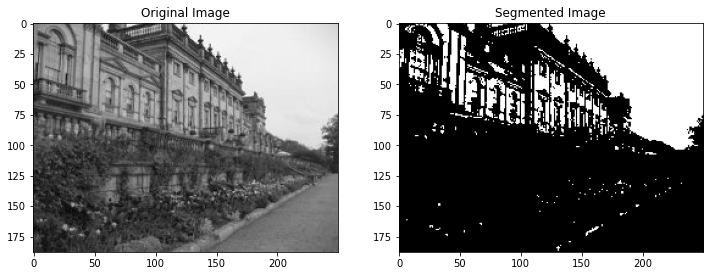

In [108]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Segmented Image')
plt.show()